In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from itertools import permutations
from numpy.linalg import eigvals

In [2]:
# --- Color and styles ---
line_color = "#8C1515"
center_color = "#353831"

# --- Small test matrix ---
n = 3  # keep small for visualization
np.random.seed(420)

A_small = np.random.randn(n, n) + 1j * np.random.randn(n, n)

D_small = np.diag(np.diag(A_small))
E_small = A_small - D_small

# --- Monte Carlo eigenvalues ---
def monte_carlo_eigenvalues(D, E, samples=3000):
    ts = np.random.rand(samples)
    eigvals = []
    for t in ts:
        At = D - t * E
        eigvals.extend(np.linalg.eigvals(At))
    return np.array(eigvals)

eigvals_small = monte_carlo_eigenvalues(D_small, E_small)


In [3]:
# --- Plot functions ---
def plot_gershgorin(A, ax, linestyle='-'):
    n = A.shape[0]

    # Plot Gershgorin discs
    for i in range(n):
        center = A[i,i]
        radius = np.sum(np.abs(A[i,:])) - np.abs(A[i,i])
        circ = plt.Circle(
            (center.real, center.imag), radius,
            fill=False, color=line_color, linestyle=linestyle,
            linewidth=2, alpha=0.9
        )
        ax.add_patch(circ)

    # Plot eigenvalues
    eigvals = np.linalg.eigvals(A)
    ax.plot(eigvals.real, eigvals.imag, 'x', color=center_color, markersize=7, mew=1)


def plot_cassini(A, ax, linestyle='--', resolution=800, extra_margin=5):
    n = A.shape[0]
    margin = max(np.max(np.abs(A.real)), np.max(np.abs(A.imag))) + extra_margin
    X, Y = np.meshgrid(np.linspace(-margin, margin, resolution),
                       np.linspace(-margin, margin, resolution))
    Z = X + 1j*Y
    for i in range(n):
        for j in range(i+1, n):
            Ri = np.sum(np.abs(A[i,:])) - np.abs(A[i,i])
            Rj = np.sum(np.abs(A[j,:])) - np.abs(A[j,j])
            lhs = np.abs(Z - A[i,i]) * np.abs(Z - A[j,j])
            rhs = Ri * Rj
            ax.contour(X, Y, lhs, levels=[rhs], colors=[line_color],
                       linewidths=1.5, linestyles=linestyle, alpha=0.9)
    # Plot eigenvalues
    eigvals = np.linalg.eigvals(A)
    ax.plot(eigvals.real, eigvals.imag, 'x', color=center_color, markersize=7, mew=1)


def plot_brualdi(A, ax, min_cycle=3, max_cycle=None, linestyle=':', resolution=400, extra_margin=5):
    n = A.shape[0]
    if max_cycle is None:
        max_cycle = n
    margin = max(np.max(np.abs(A.real)), np.max(np.abs(A.imag))) + extra_margin
    X, Y = np.meshgrid(np.linspace(-margin, margin, resolution),
                       np.linspace(-margin, margin, resolution))
    Z = X + 1j*Y
    R = [np.sum(np.abs(A[i,:])) - np.abs(A[i,i]) for i in range(n)]

    first = True
    for length in range(min_cycle, max_cycle+1):
        for cycle in permutations(range(n), length):
            if cycle[0] != min(cycle):
                continue
            lhs = np.ones_like(Z, dtype=float)
            rhs = 1
            for i in cycle:
                lhs *= np.abs(Z - A[i,i])
                rhs *= R[i]
            ax.contour(X, Y, lhs, levels=[rhs], colors=[line_color],
                       linewidths=1.5, linestyles=linestyle, alpha=0.7,
                       label=f'Cycle length {length}' if first else None)
            first = False
    # Plot eigenvalues
    eigvals = np.linalg.eigvals(A)
    ax.plot(eigvals.real, eigvals.imag, 'x', color=center_color, markersize=7, mew=1)

# --- Styling ---
def style_ax(ax, title, margin=None):
    ax.set_title(title, fontsize=14, color='black', pad=15)
    ax.set_xlabel("Re(z)", fontsize=12)
    ax.set_ylabel("Im(z)", fontsize=12)
    ax.tick_params(colors='black')
    ax.set_aspect('equal')
    if margin is not None:
        ax.set_xlim(-margin, margin)
        ax.set_ylim(-margin, margin)
    ax.grid(True, color='gray', linestyle=':', alpha=0.4)

/tmp/ipython-input-3973118784.py:60: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X, Y, lhs, levels=[rhs], colors=[line_color],


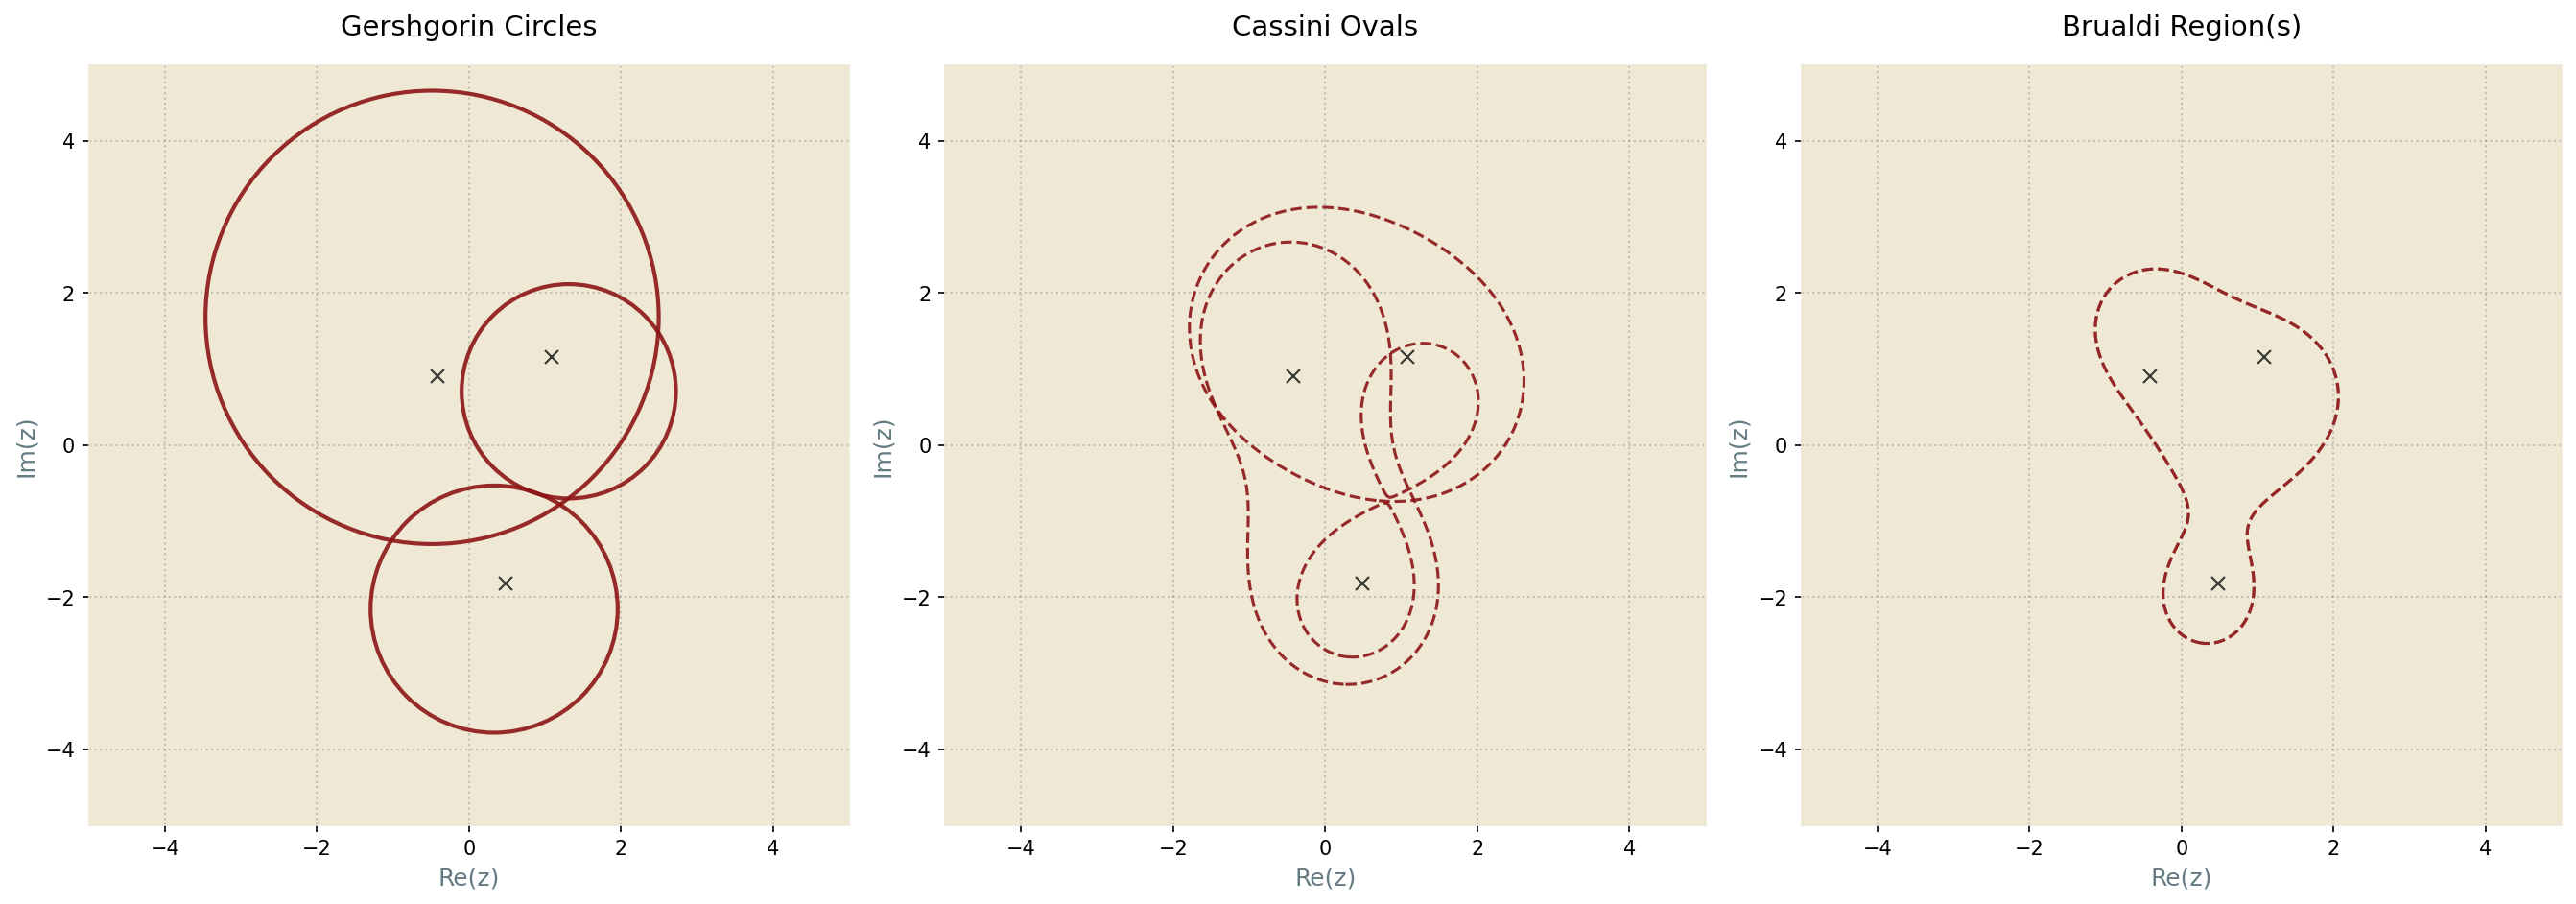

In [6]:
plt.style.use("Solarize_Light2")
fig, axes = plt.subplots(1, 3, figsize=(18,6), dpi=150)
fig.patch.set_alpha(0.0)

# Gershgorin
plot_gershgorin(D_small - E_small, axes[0], linestyle='-')
style_ax(axes[0], "Gershgorin Circles", margin=5)

# Cassini
plot_cassini(D_small - E_small, axes[1], linestyle='--')
style_ax(axes[1], "Cassini Ovals", margin=5)


# Brualdi (cycle length ≥3)
plot_brualdi(D_small - E_small, axes[2], min_cycle=3, max_cycle=5, linestyle='--')
style_ax(axes[2], "Brualdi Region(s)", margin=5)


plt.tight_layout()
plt.show()

In [9]:
def style_ax(ax, title, margin=None):
    ax.set_title(title, fontsize=14, color='black', pad=15)
    ax.set_xlabel("Re(z)", fontsize=12)
    ax.set_ylabel("Im(z)", fontsize=12)
    ax.tick_params(colors='black')
    ax.set_aspect('equal')
    if margin is not None:
        ax.set_xlim(-margin, margin)     # Set x-limits using margin
        ax.set_ylim(-margin, margin)     # Set y-limits using margin
    ax.grid(True, color='gray', linestyle=':', alpha=0.4)

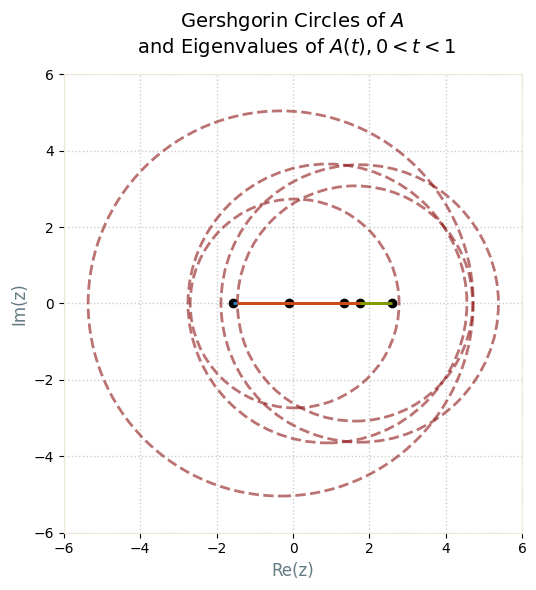

In [12]:
# Setup
np.random.seed(1)
n = 5
A = np.random.randn(n, n)
diagA = np.diag(np.diag(A))
E = A - diagA

ts = np.linspace(0, 1, 100)
eig_traj = []
for t in ts:
    At = diagA + t * E
    eigs = eigvals(At)
    eig_traj.append(eigs)
eig_traj = np.array(eig_traj)  # shape (len(ts), n)

fig, ax = plt.subplots(figsize=(6, 6))
margin = 3  # Change this value to adjust both x and y axis margins
for j in range(n):
    ax.plot(eig_traj[:, j].real, eig_traj[:, j].imag, lw=2)
    ax.scatter(eig_traj[-1, j].real, eig_traj[-1, j].imag, color='k')

for i in range(n):
    center = A[i, i]
    radius = np.sum(np.abs(A[i, :])) - abs(A[i, i])
    gersh = plt.Circle((center.real, center.imag), radius, fill=False, color='#8C1515', lw=2, linestyle='--', alpha=0.6)
    ax.add_patch(gersh)

plt.style.use("Solarize_Light2")
fig.patch.set_alpha(0.0)  # Makes the outer figure area fully transparent
ax.set_facecolor('none')  # Makes the axes (plot area) fully transparent
style_ax(ax, "Gershgorin Circles of $A$ \n and Eigenvalues of $A(t), 0<t<1$", margin=6)
plt.tight_layout()
plt.show()